In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [136]:
import math
from numpy import sqrt, exp
from numpy.linalg import det, inv
def compute_log_p(X, mean, sigma):
    a = 1 / ((2 * math.pi) ** (d / 2) * sqrt(det(sigma)))
    xmu = X - mean
    prod = (xmu @ inv(sigma)) * xmu
    res = a * exp(-0.5 * prod.sum(1))
    print(res)
    return res

In [137]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

[2.84129901e+00 1.60437497e+00 1.81372790e-05 1.70090210e-01
 3.92269290e-01 2.72755247e-02 3.59884701e+00 7.22515831e-02
 3.22516948e-04 1.72020315e-03 1.70682908e+00 2.11248415e-01
 2.42142110e+00 3.93040086e+00 5.77629065e-01 4.33830262e+00
 6.35469071e-04 2.29786250e+00 6.28298917e-02 4.81621202e-03
 3.04968901e+00 2.90879897e-02 1.54307568e-02 1.11358518e-03
 1.85261078e-01 1.81636219e+00 3.87921977e+00 3.13338099e+00
 4.21229615e+00 3.67625856e-01 2.83900629e-02 4.13758867e+00
 2.03216632e+00 5.04963651e-02 8.10545533e-02 3.11784251e+00
 1.46489773e+00 1.33956106e-01 1.93253832e+00 2.11977679e-02
 2.87283256e-05 3.47177964e-03 7.08872347e-03 2.27082344e-01
 1.00414144e-05 4.08425735e+00 8.10404958e-07 1.07289443e+00
 8.92665283e-01 1.73232949e+00 1.04915651e+00 7.24079609e-02
 3.25634195e-01 7.66337108e-02 2.12451089e-01 3.82460478e-01
 6.64857893e-01 3.24283435e-02 9.89805664e-01 1.08476417e-04
 5.06342856e-03 5.93334806e-03 2.85702154e+00 1.00914057e+00
 3.55770962e-01 4.723812

In [138]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


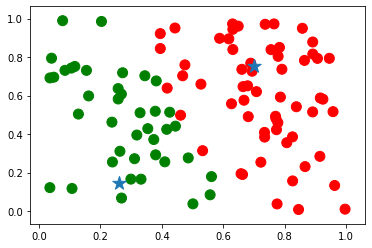

In [139]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()